In [15]:
"""
Check all datasets
"""
%matplotlib inline
%load_ext autotime
%load_ext autoreload
%autoreload
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
from ipywidgets import interact
from ipywidgets import Controller

import numpy as np
import sys
from tqdm import tqdm
import pandas as pd
sys.path.append('/export/home/asanakoy/workspace/neural_network')
sys.path.append('/export/home/asanakoy/workspace/art_datasets')
import make_data.dataset
import wikiart.info.preprocess_info
import art_datasets.read
from art_utils.pandas_tools import is_null_object


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
time: 435 ms


In [5]:
interact(i=(0,10))

<function ipywidgets.widgets.interaction.dec>

time: 4.61 ms


In [ ]:
Controller()

In [16]:
dfs = art_datasets.read.read_datasets()
df = pd.read_hdf('/net/hci-storage02/userfolders/asanakoy/workspace/artnet/info/artworks_wiki+googleart+wga+meisterwerke+moma+artuk+rijks_v1.00.hdf5')

time: 31.4 s


rembrandt harmensz. van rijn


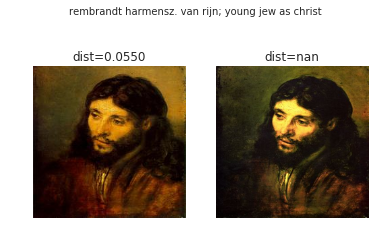

In [23]:
def browse_images(df):
    n = len(df)
    plt.figure(figsize=(15, 4))
    def view_image(i):
        obj = df.iloc[i].to_dict()
        if 'artist_name' not in obj:
            obj['artist_name'] = obj['artist_slug']
        elif is_null_object(obj['artist_name']):
            obj['artist_name'] = 'nan'
            print 'NAN FOUND'
        elif isinstance(obj['artist_name'], list):
            print obj['artist_name']
        else:
            print obj['artist_name']
        if is_null_object(obj['title']):
            obj['title'] = ''
#         print obj['duplicate_dists']
        image_paths = []
        for image_id_full in obj['duplicate_ids']:
            dataset_name, image_id = image_id_full.split('_', 1)
            image_paths.append(dfs[dataset_name].at[image_id, 'image_path'])
        
        for j, (image_id, image_path, dist_in_group) in enumerate(zip(obj['duplicate_ids'], 
                                                             image_paths, 
                                                             obj['duplicate_dists'])):
            plt.subplot(1, len(image_paths), j + 1)
            im = plt.imread(image_path)
            plt.imshow(im, interpolation=None)
            plt.title('dist={:.4f}'.format(dist_in_group if dist_in_group is not None else np.nan))
            plt.grid(False)
            plt.axis('off')
            
        plt.suptitle(unicode(obj['artist_name']) + u'; ' + obj['title'][:100])
        plt.show()
    interact(view_image, i=(0, n-1))

cur_df = df
mask = (cur_df['duplicate_ids'].apply(len) > 1) & (cur_df['artist_id'].str.contains('rembrandt'))
browse_images(cur_df[mask])